## BCR-ABL inhibition by dasatinib

In [5]:
#Supporting packages for analysis
import numpy as np
import pandas as pd

#KSTAR imports
from kstar import config, helpers
from kstar.plot import DotPlot

import sys
sys.path.append('../')
import conf #This is the local config file for setting the supplements directory to your local environment


#Set matplotlib defaults for arial 12 point font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12
import matplotlib.pyplot as plt

#Directory where KSTAR Supplemental data was set 
odir = conf.SUPPLEMENTS_DIR+'Control_Experiments (Fig2)/BCR_ABL_K562_Asmussen2014'

#load the Mann Whitney activities and FPR for Tyrosine predictions, 
#it will be faster and less data than loading all KSTAR outputs
activities = pd.read_csv(odir+'/RESULTS/BCR-ABL_Y_mann_whitney_activities.tsv', sep='\t', index_col=0)
fpr = pd.read_csv(odir+'/RESULTS/BCR-ABL_Y_mann_whitney_fpr.tsv', sep='\t', index_col=0)

        
#set preferred kinase names (make a kinase_dict)
kinase_dict = {}
for kinase in activities.index:
    kinase_dict[kinase] = conf.KINASE_MAP.loc[kinase,'Preferred Name']

In [6]:
#Make a dictionary for labeling 
x_label_dict = {}
x_label_dict['data:treated_to_untreated:EOE(drug washout)'] = 'EOE'
x_label_dict['data:treated_to_untreated:HDP3(3hrs post treatment)'] = 'HDP3'
x_label_dict['data:treated_to_untreated:HDP6(6hrs post treatment)'] = 'HDP6'
x_label_dict['data:treated_to_untreated:pre-treatment'] = 'PRE'

<AxesSubplot:>

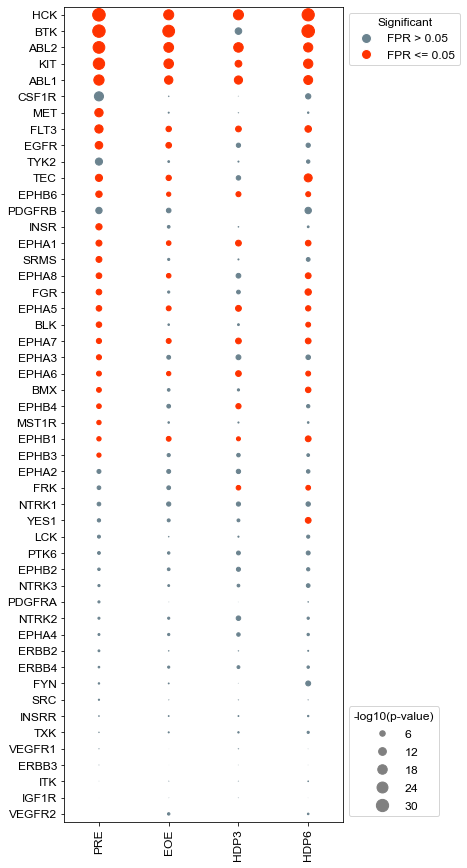

In [7]:

results = activities
results = results[['data:treated_to_untreated:pre-treatment', 
                  'data:treated_to_untreated:EOE(drug washout)', 
                  'data:treated_to_untreated:HDP3(3hrs post treatment)',
                  'data:treated_to_untreated:HDP6(6hrs post treatment)']]
results = results.sort_values('data:treated_to_untreated:pre-treatment', ascending=True)

results = -np.log10(results)


#Setup a figure with a context strip at the top for HER2 status and activity dots on the below axis
fig, axes = plt.subplots(figsize = (5, 15))
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr, 
                       figsize = (5,15), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                      x_label_dict=x_label_dict,
                      kinase_dict=kinase_dict)
#dots.drop_kinases_with_no_significance()
#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
#dots.cluster(orientation = 'left', ax = axes[2,0], method='ward')
#dots.cluster(orientation = 'top', ax = axes[0,1], method='ward')

dots.dotplot(axes)
#plt.savefig(odir+'BCR-ABL_all.pdf', bbox_inches='tight')

<AxesSubplot:>

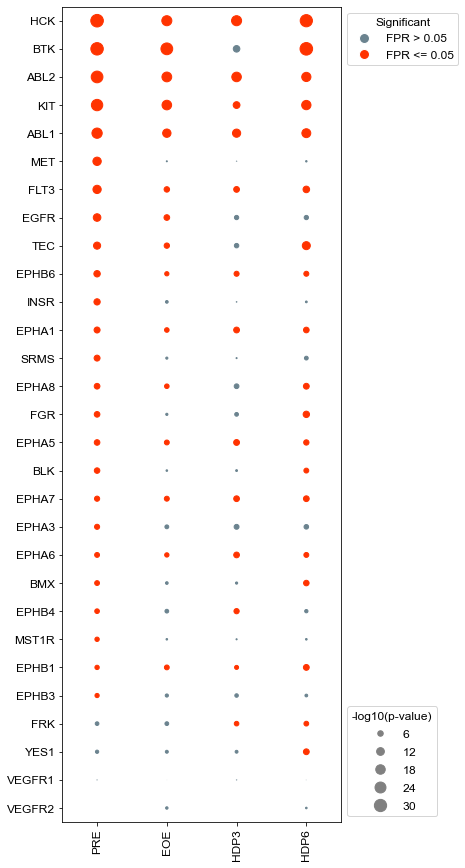

In [8]:

results = activities
results = results[['data:treated_to_untreated:pre-treatment', 
                  'data:treated_to_untreated:EOE(drug washout)', 
                  'data:treated_to_untreated:HDP3(3hrs post treatment)',
                  'data:treated_to_untreated:HDP6(6hrs post treatment)']]
results = results.sort_values('data:treated_to_untreated:pre-treatment', ascending=True)

results = -np.log10(results)


#Setup a figure with a context strip at the top for HER2 status and activity dots on the below axis
fig, axes = plt.subplots(figsize = (5, 15))
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr, 
                       figsize = (5,15), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                      x_label_dict=x_label_dict,
                      kinase_dict=kinase_dict)
dots.drop_kinases_with_no_significance()
#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
#dots.cluster(orientation = 'left', ax = axes[2,0], method='ward')
#dots.cluster(orientation = 'top', ax = axes[0,1], method='ward')

dots.dotplot(axes)
#plt.savefig(odir+'BCR-ABL_SigKinases.pdf', bbox_inches='tight')

[None, None, None, None, None, None, None, None]

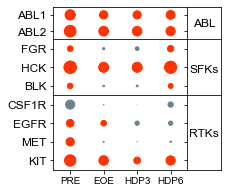

In [27]:
group1 = ['ABL1','ABL2']
group2 = ['FGR', 'HCK', 'BLK']
group3 = ['CSF1R','EGFR','MET','KIT']

results = -np.log10(activities)
results = results[['data:treated_to_untreated:pre-treatment', 
                  'data:treated_to_untreated:EOE(drug washout)', 
                  'data:treated_to_untreated:HDP3(3hrs post treatment)',
                  'data:treated_to_untreated:HDP6(6hrs post treatment)']]
fpr = fpr[['data:treated_to_untreated:pre-treatment', 
                  'data:treated_to_untreated:EOE(drug washout)', 
                  'data:treated_to_untreated:HDP3(3hrs post treatment)',
                  'data:treated_to_untreated:HDP6(6hrs post treatment)']]

fig, axes = plt.subplots(figsize = (3, 3), 
        nrows = 3, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = { 
            'width_ratios':[1,0.25],
            'height_ratios': [0.35,0.6,0.8]
        },)
fig.subplots_adjust(wspace=0, hspace=0)


dots1 = DotPlot(results.loc[group1], 
                       fpr.loc[group1], 
                       figsize = (10,10), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                      x_label_dict = x_label_dict,
                      kinase_dict = kinase_dict)

dots2 = DotPlot(results.loc[group2], 
                       fpr.loc[group2], 
                       figsize = (10,10), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                      x_label_dict = x_label_dict,
                      kinase_dict = kinase_dict)

dots3 = DotPlot(results.loc[group3], 
                       fpr.loc[group3], 
                       figsize = (10,10), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                      x_label_dict = x_label_dict,
                      kinase_dict = kinase_dict)

#adjust x-axis
#axes[2,0].set_xlabel('Time Since Drug Washout (hours)', fontsize = 14)

dots1.dotplot(ax = axes[0,0], max_size = 32, size_legend = False, color_legend = False)
dots2.dotplot(ax = axes[1,0], max_size = 32, size_legend = False, color_legend = False)
dots3.dotplot(ax = axes[2,0], max_size = 32, size_legend = False, color_legend = False)

axes[2,1].set_xticks([])
axes[0,1].annotate('ABL', (0.5, 8), ha = 'center', fontsize = 12)
axes[2,1].annotate('RTKs', (0.5, 18), ha = 'center', fontsize = 12)
axes[1,1].annotate('SFKs', (0.5, 12), ha = 'center', fontsize = 12)

plt.setp(axes[2,0].xaxis.get_majorticklabels(), rotation=0, fontsize = 10, ha = 'center')